# **Mathematical Background: Complex Numbers**

Complex numebrs are fundamental to the theory of quantum computing. We will see later that a qubit can be described as a pair of complex numbers.

A complex number is composed of a pair of numbers $a$ and $b$, written out as

$$z = a + bi$$

where $i^2=-1$. The number $a$ is called the "real part" and the number $b$ is called the "imaginary part."

Adding complex numebrs is done by adding their real and imaginary parts separately.

$$z_1+z_2 = (a_1+b_1) + (a_2+b_2)i$$

Multiplying complex numbers is done by expanding algebraically, and substituting $i^2=-1$, which gives the following formula.

$$z_1z_2 = (a_1+b_1i)(a_2+b_2i)=a_1a_2-b_1b_2 + i(a_1b_2+a_2b_1)$$

Python has complex numbers built in, where $i=$ `1j`. For example, the complex number $2-3i$ would be written as `2 - 3j`. Below are a number of examples to test your intuition.


**Example:Addition**

In [1]:
(2 + 3j) + (5 - 7j)

(7-4j)

**Example: Multiplication**

In [2]:
1j * 1j

(-1+0j)

In [3]:
(1 + 2j) * (1 - 2j)

(5+0j)

**Example: Real and Imginary Parts**

In [4]:
z = 3 - 4j

(z.real, z.imag)

(3.0, -4.0)

**Example: Magnitude**

The magnitude of a complex number is the distance from 0. The magnitude of a product of complex numbers is the product of the magnitudes.

In [5]:
z = 3 + 4j

abs(z)

5.0

In [6]:
z = 3 + 4j
w = 5 + 12j

(abs(z), abs(w), abs(z * w))

(5.0, 13.0, 65.0)

**Example: Angle**

The argument or phase of a complex number is the angle with the x-axis. The phase of a product of complex numbers is the sum of the phases.

In [7]:
from cmath import phase, pi

phase(1+1j)

0.7853981633974483

In [8]:
pi / 4

0.7853981633974483

In [9]:
z = 3 + 4j
w = 5 + 12j

(phase(z), phase(w), phase(z * w), phase(z)+phase(w))

(0.9272952180016122, 1.176005207095135, 2.1033004250967475, 2.103300425096747)

**Example: Plotting Complex Numbers**

In [10]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def generate_complex_plane(figsize=(2, 2), xlim=[0, 1], ylim=[0, 1]):
      plt.figure(figsize=figsize)
      plt.grid()
      plt.xlim(xlim)
      plt.ylim(ylim)
      plt.xlabel(r'$\mathrm{Re}$')
      plt.ylabel(r'$\mathrm{Im}$')

def plot_complex(c, color="k"):
  return plt.arrow(0, 0, np.real(c), np.imag(c),
                   head_width=0.25, fc=color, ec=color, overhang=0.3,
                    length_includes_head=True)

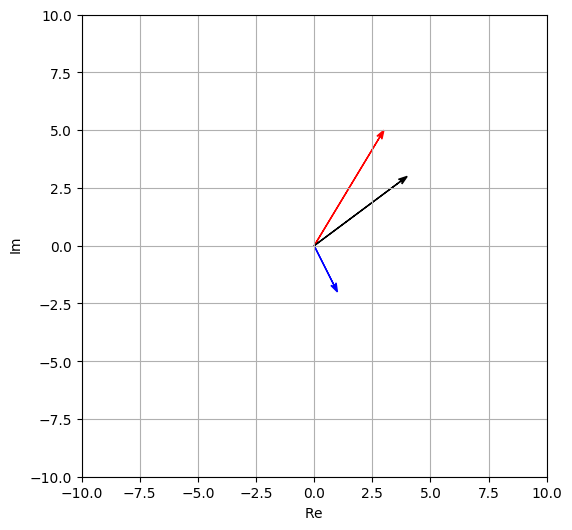

In [11]:
generate_complex_plane(figsize=(6,6), xlim = [-10, 10], ylim = [-10, 10])

z = 3+5j
w = 1-2j
plot_complex(z, "r")
plot_complex(w, "b")
plot_complex(z+w, "k")

# **Qubits and the Bloch Sphere**

Qubit are described by two-dimensional quantum systems, whose elements can be described by two complex numbers $\alpha$ and $\beta$ with the constraint that:

$$|\alpha|^2 + |\beta|^2 = 1$$

We will often write a qubit as a $2\times 1$ vector. The two "basis" states that corresponding to $0$ and $1$ are given by

$$\lvert0\rangle=\begin{pmatrix}1\\0\end{pmatrix}$$

and

$$\lvert1\rangle=\begin{pmatrix}0\\1\end{pmatrix}$$.

Every qubit can then be written as

$$\alpha\lvert0\rangle+\beta\lvert1\rangle$$

and can be thought of as a "superposition" of $0$ and $1$.

Qubits can be represented geometrically as vectors in the "Bloch sphere" by $3$ real coordinates. This representation will be helpful for understanding a number of concepts.

A simple operation for obtaing states describing multiple qubits is the tensor product, which is written as, e.g.,

$$\lvert1\rangle\otimes \lvert1\rangle = \lvert11\rangle$$

and

$$(\alpha_1\lvert0\rangle+\beta_1\lvert1\rangle)\otimes(\alpha_2\lvert0\rangle+\beta_2\lvert1\rangle) = \alpha_1\alpha_2 \lvert00\rangle+\alpha_1\beta_2 \lvert01\rangle+\beta_1\alpha_2 \lvert10\rangle+\beta_1\beta_2 \lvert11\rangle$$

etc.


In [12]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

s0 = Statevector([1, 0])
s1 = Statevector([0, 1])

**Example: Quantum state $\lvert1\rangle$ in the Bloch sphere**

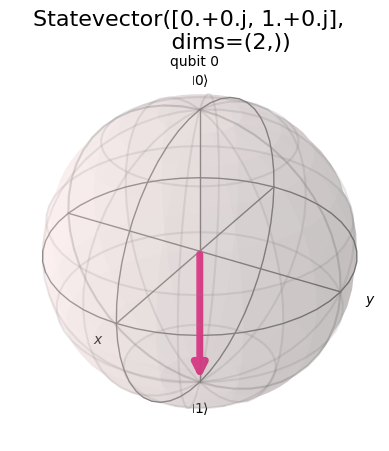

In [13]:
from qiskit.visualization import plot_bloch_multivector

def plot_state(s):
  return plot_bloch_multivector(s, title=str(s))

plot_state(s1);

**Example: Quantum state rotated in the XZ plane in the Bloch sphere**

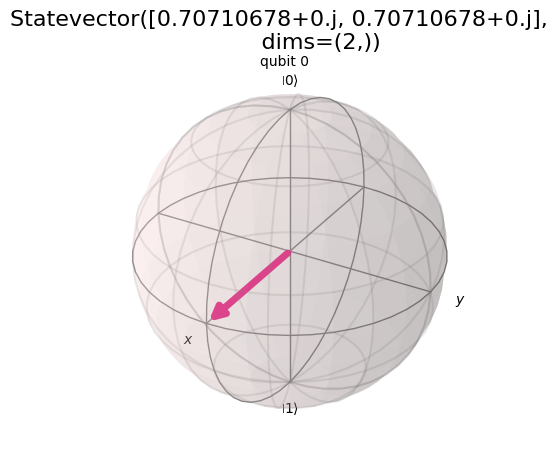

In [14]:
from numpy import cos, sin, pi

def sXZ(theta):
  return Statevector([cos(theta), sin(theta)])

plot_state(sXZ(pi/4));

In [15]:
sXZ(pi/4).draw("latex")

<IPython.core.display.Latex object>

**Example: Tensor product of quantum states**

For 3 qubits, there are 8 possible outcomes. Below is a a superposition of two such states.

$\lvert1\rangle\otimes\left(\frac{\sqrt{2}}{2}\lvert0\rangle+\frac{\sqrt{2}}{2}\lvert1\rangle\right)\otimes\lvert0\rangle = \frac{\sqrt{2}}{2}\lvert100\rangle+\frac{\sqrt{2}}{2}\lvert110\rangle$

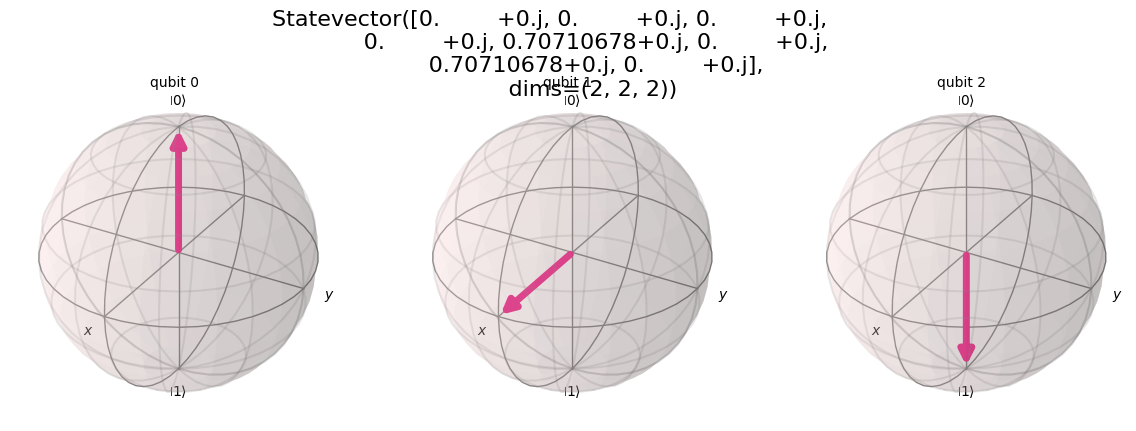

In [16]:
plot_state(s1^sXZ(pi/4)^s0);

# **Measurment**

Measuring a qubit "collapses" its state to either a $0$ or a $1$. When written as

$$\alpha\lvert0\rangle+\beta\lvert1\rangle$$

the probability of measuring a $0$ is $|\alpha|^2$ and the probability of measuring a $1$ is $|\beta|^2$, which is exactly why we impose that $|\alpha|^2+|\beta|^2=1$.

(NB: This is called "measuring in the z basis" which can be seen by the fact that in the Bloch sphere $\lvert0\rangle$ and $\lvert1\rangle$ are on the $z$-axis.)



**Example: Measuring a single qubit which is 0 with 50% probability and 1 with 50% probability**

In [17]:
(sXZ(pi/4).data[0]**2,(sXZ(pi/4).data[1]**2))

((0.5000000000000001+0j), (0.4999999999999999+0j))

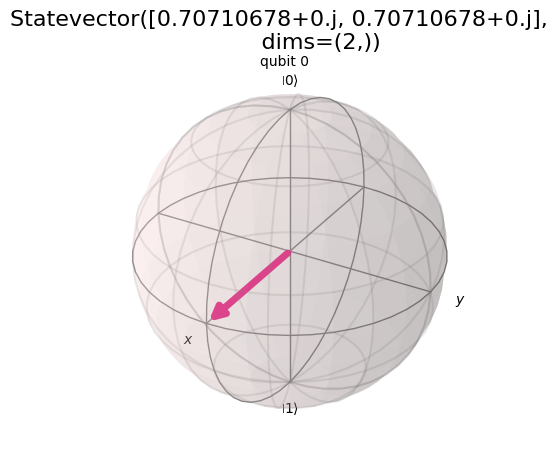

In [18]:
plot_state(sXZ(pi/4));

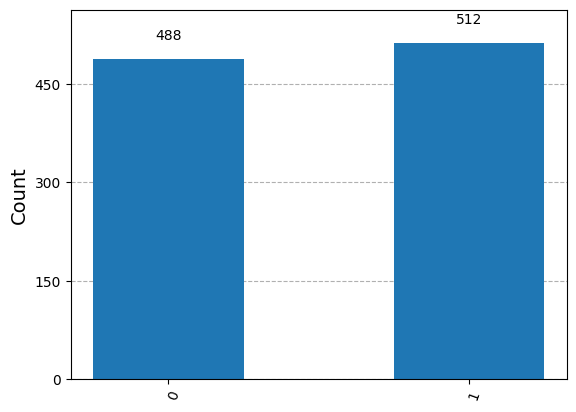

In [19]:
from qiskit.visualization import plot_histogram

statistics = sXZ(pi/4).sample_counts(1000)
plot_histogram(statistics);

**Example: Measuring multiple qubits**

For states with multiple qubits, the coefficients still give the probabilities.

In [20]:
[abs(p**2) for p in (sXZ(-pi/8)^sXZ(-pi/3)^sXZ(pi/4)).data]

[0.10669417382415926,
 0.10669417382415926,
 0.3200825214724777,
 0.32008252147247757,
 0.018305826175840798,
 0.01830582617584079,
 0.05491747852752235,
 0.05491747852752234]

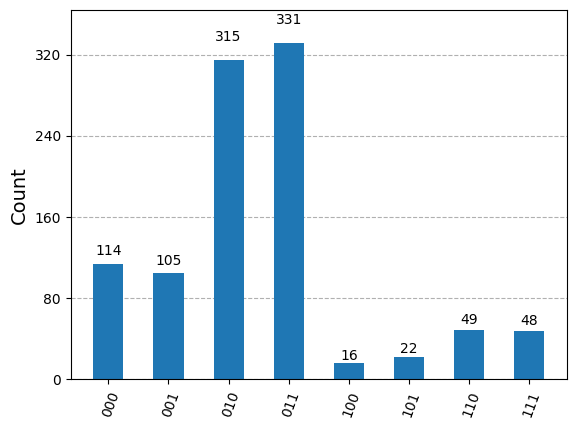

In [21]:
plot_histogram((sXZ(-pi/8)^sXZ(-pi/3)^sXZ(pi/4)).sample_counts(1000));

## **Quantum Circuits and Quantum Gates**

Operations on qubits are performed by "unitary operations" which are given by matrices satisfying

$$UU^\dagger=1$$

where $U^\dagger$ is the "conjugate transpose," which we won't define now. What matters is that quantum gates are always reversible, unlike some standard logic gates like OR, and they preserve probabilities.

A single qubit gate will be a $2\times 2$ matrix

$$U=\begin{pmatrix}u_{11}&u_{12}\\u_{21}&u_{22}\end{pmatrix}$$

which we can apply to qubits in their vector notation as follows

$$U\cdot q=\begin{pmatrix}u_{11}&u_{12}\\u_{21}&u_{22}\end{pmatrix}\cdot \begin{pmatrix}\alpha\\ \beta\end{pmatrix} = \begin{pmatrix}u_{11}\alpha+u_{12}\beta\\u_{21}\alpha+u_{22}\beta\end{pmatrix}$$

**Example: $X$-gate**

The simplest example is the $X$-gate, which is given by

$$X=\begin{pmatrix}0&1\\1&0\end{pmatrix}$$

which acts like the logical NOT gate on $\lvert0\rangle$ and $\lvert1\rangle$:

$$X\lvert0\rangle=\lvert1\rangle$$
$$X\lvert1\rangle=\lvert0\rangle$$

**Components of a Quantum Circuit**

Quantum circuits are composed of


1.   A set of qubits usually depicted as "wires"
2.   A series of quantum gates depicted as boxes connecting the wires of the qubits they act on. Gates are conventionally executed from left to right.
3. Finally, measurments are done on either all or a subset of qubits to read out classical information.

A single run of a quantum circuit is called a "shot," many of which are needed to gather statistics and determine the probabilities of the outcomes. To start with we will not include measurment, and will instead investigate how qubits and gates behave.



**Example: Circuit for rotating a single qubit**

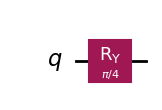

In [22]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

def r_circuit(xyz, theta):
  qc = QuantumCircuit(1)
  if xyz == 'x':
    qc.rx(theta, 0)
  elif xyz == 'y':
    qc.ry(theta, 0)
  elif xyz == 'z':
    qc.rz(theta, 0)

  return qc

r_circuit("y", pi/4).draw("mpl");


**Input state: $\lvert0\rangle$**

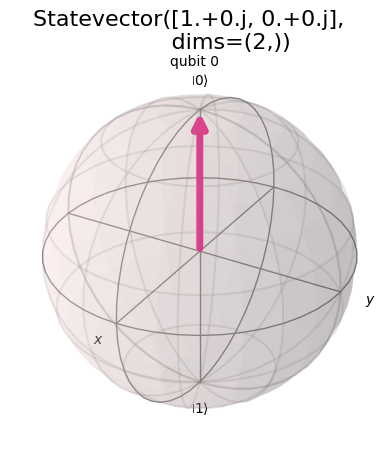

In [23]:
plot_state(Statevector([1,0]));

**Unitary matrix corresponding to the circuit**


In [24]:
Operator(r_circuit("y", pi/4))

Operator([[ 0.92387953+0.j, -0.38268343+0.j],
          [ 0.38268343+0.j,  0.92387953+0.j]],
         input_dims=(2,), output_dims=(2,))


**Output state**

In [25]:
Statevector([1,0]).evolve(Operator(r_circuit("y", pi/4)))

Statevector([0.92387953+0.j, 0.38268343+0.j],
            dims=(2,))


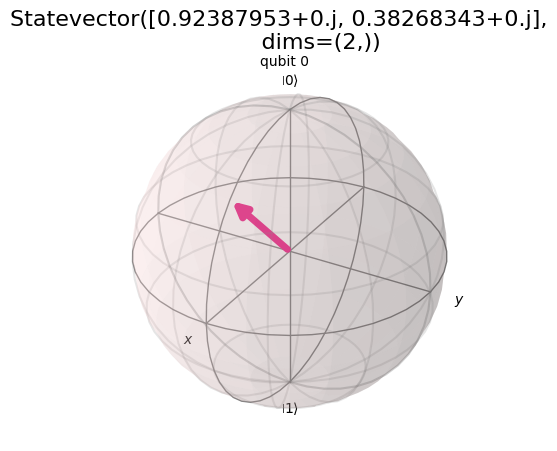

In [26]:
plot_state(Statevector([1,0]).evolve(Operator(r_circuit("y", pi/4))));

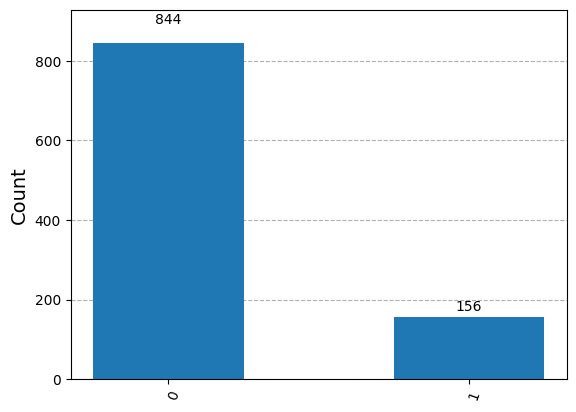

In [27]:
plot_histogram(Statevector(r_circuit("y", pi/4)).sample_counts(1000));

# **Entanglement**

Sometimes measuring one qubit can affect other qubits, though a process called "entanglement"!

**Example: Bell pair circuit**

A Bell pair is the simplest example of two entangled states.

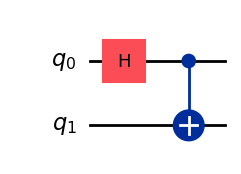

In [28]:
def Bell_pair_circuit():
    qc = QuantumCircuit(2,name='create_Bell_pair')
    qc.h(0)
    qc.cx(0,1)

    return qc

Bell_pair_circuit().draw("mpl");

It is no longer possible to plot this state on a pair of Bloch spheres! This state is not ''seperable.''

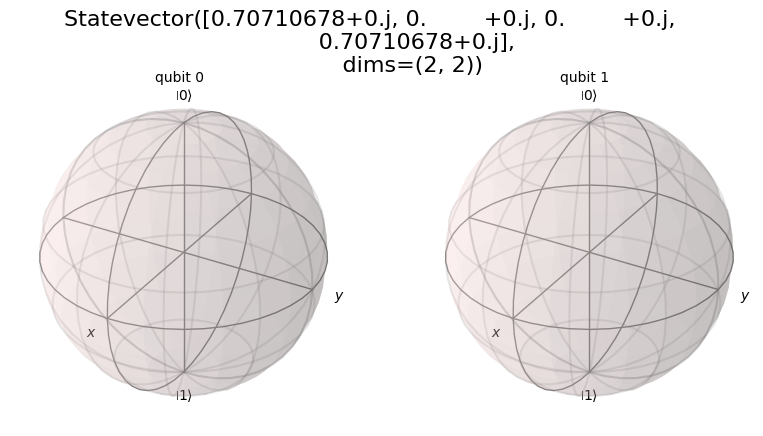

In [29]:
plot_state(Statevector(Bell_pair_circuit()));

In [30]:
Statevector(Bell_pair_circuit()).draw("latex")

<IPython.core.display.Latex object>

Unitary matrix corresponding to the Bell pair circuit.

In [31]:
Operator(Bell_pair_circuit())

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
           -0.70710678+0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
            0.        +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


If the first qubit is measured to be 0 then the second qubit is also 0, and if the first qubit is measure to be 1 then the second qubit is also 1!

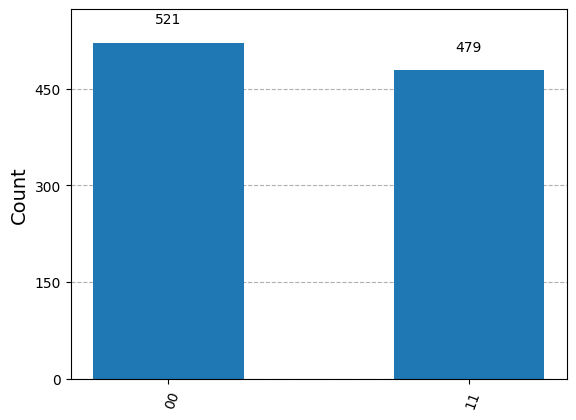

In [32]:
plot_histogram(Statevector(Bell_pair_circuit()).sample_counts(1000));

# Quantum State Tomography

By only measuring in $z$-basis you cannot reconstruct the original state.

**Example: Measuring in the z-basis it is not possible to distinguish between a rotation by $\pi/2$ about the x-axis and a rotation by $\pi/2$ about the y-axis.**

Rotation about the x-axis:

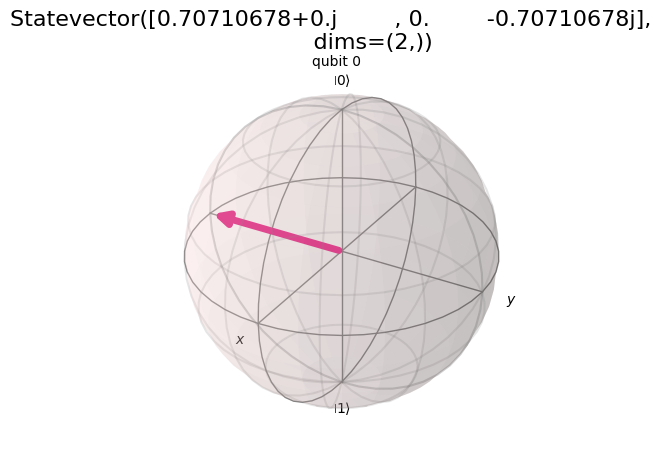

In [33]:
plot_state(Statevector(r_circuit("x",pi/2)));

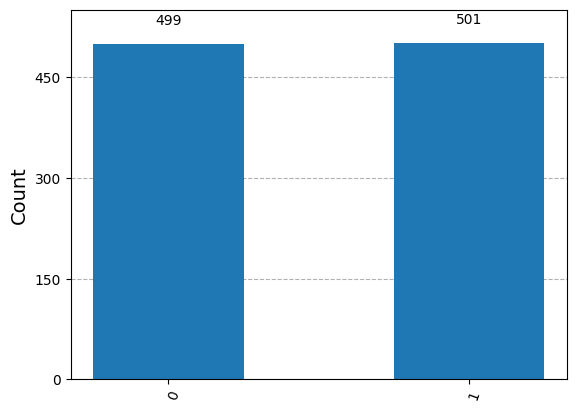

In [34]:
plot_histogram(Statevector(r_circuit("x",pi/2)).sample_counts(1000));

Rotation about the y-axis:

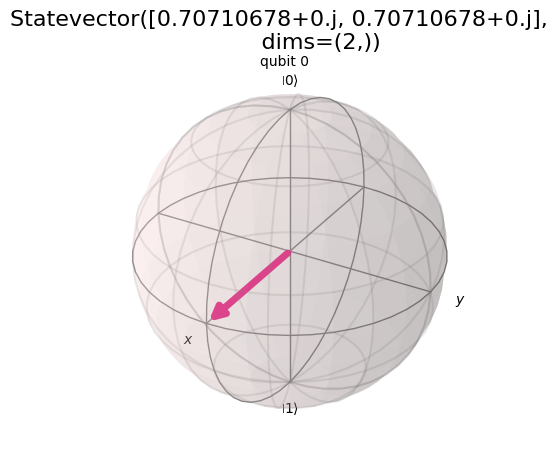

In [35]:
plot_state(Statevector(r_circuit("y",pi/2)));

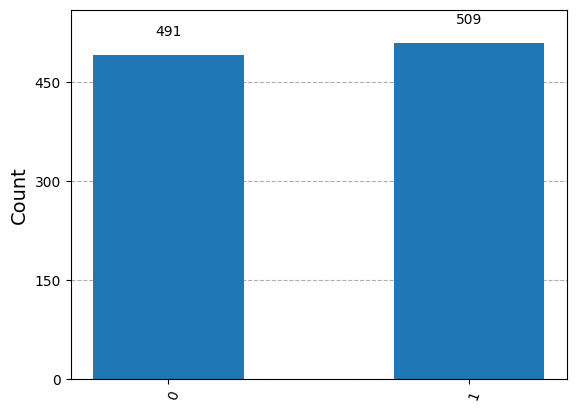

In [36]:
plot_histogram(Statevector(r_circuit("y",pi/2)).sample_counts(1000));

**Example: By measuring in the y-basis, we can now tell apart rotations about the $x$ and $y$ axis by $\pi/2$.**

---





In [37]:
def measure_r_circuit(xyz, theta, basis, shots=1000):
  qc = r_circuit(xyz, theta)

  if basis == "y":
    qc.rz(-pi/2, 0)

  if basis in ["x", "y"]:
    qc.h(0)

  return Statevector(qc).sample_counts(shots)

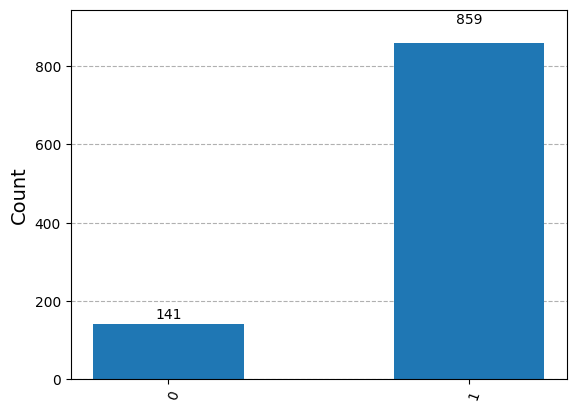

In [38]:
plot_histogram(measure_r_circuit("x", pi/4, "y"));

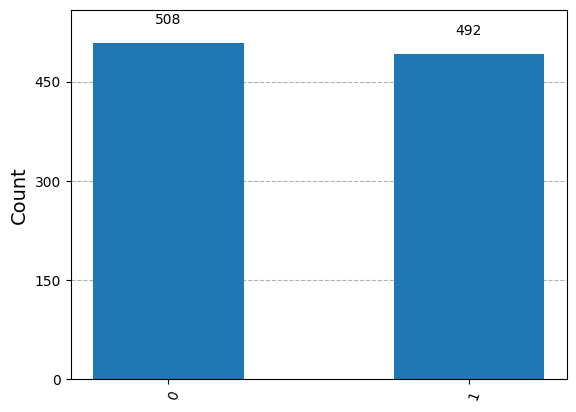

In [39]:
plot_histogram(measure_r_circuit("y", pi/4, "y"));

**Example: Reconstructing the Bloch sphere coordinates from measurements in all three basis**

In [40]:
def counts_to_coord(counts, shots=1000):
  return 2*sum(counts[c2c1c0] for c2c1c0 in counts if c2c1c0[0]=="0")/shots - 1

def get_Bloch_sphere_coordinates_from_r_circuit(xyz, theta, shots=1000):
  x_counts = measure_r_circuit(xyz, theta, "x")
  y_counts = measure_r_circuit(xyz, theta, "y")
  z_counts = measure_r_circuit(xyz, theta, "z")

  (x,y,z)  = (counts_to_coord(counts) for counts in [x_counts, y_counts, z_counts])

  return (x,y,z)

In [41]:
get_Bloch_sphere_coordinates_from_r_circuit("x", pi/2)

(-0.040000000000000036, -1.0, -0.05400000000000005)

In [42]:
get_Bloch_sphere_coordinates_from_r_circuit("y", pi/2)

(1.0, -0.018000000000000016, 0.04400000000000004)

# Simulating Circuits

So far, we have been explicitly "simulating" the circuits, but Qiskit has a built-in framework for qubit measurment and circuit simulation, which we will now use.

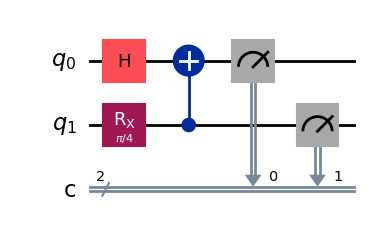

In [43]:
qc = QuantumCircuit(2, 2)
qc.rx(pi/4,1)
qc.h(0)
qc.cx(1,0)
qc.measure([0,1], [0,1])
qc.draw("mpl");

(Note that just as a classical CPU has a fixed instruction set, a QPU will have a fixed set of "native gates" that all circuits must be expressed in. The process of converting a circuit with arbitrary gates into one with only native gates is called "transpilation" which we will skip here.)

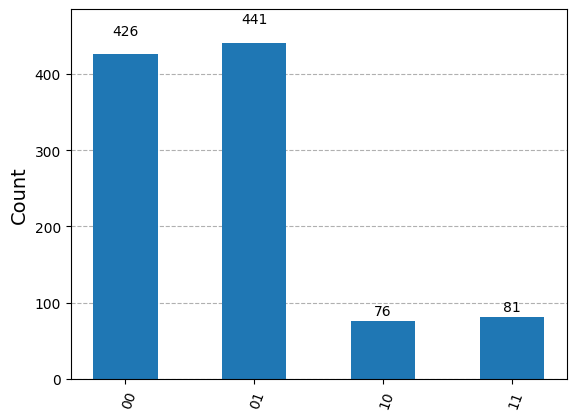

In [44]:
from qiskit import transpile
from qiskit_aer import AerSimulator

simulator = AerSimulator()
# qc = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts);

# Example Quantum Circuit: Quantum Teleportation

Teleport a state given by rotating $(1,0,0)$ in the Bloch sphere around the z-axis by an angle theta.

The state given by $(1,0,0)$ corresponds to $\lvert{+}\rangle = H\lvert0\rangle=\frac{\sqrt{2}}{2}\lvert0\rangle+\frac{\sqrt{2}}{2}\lvert1\rangle$.

Based on https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep5_Quantum_Teleportation.ipynb

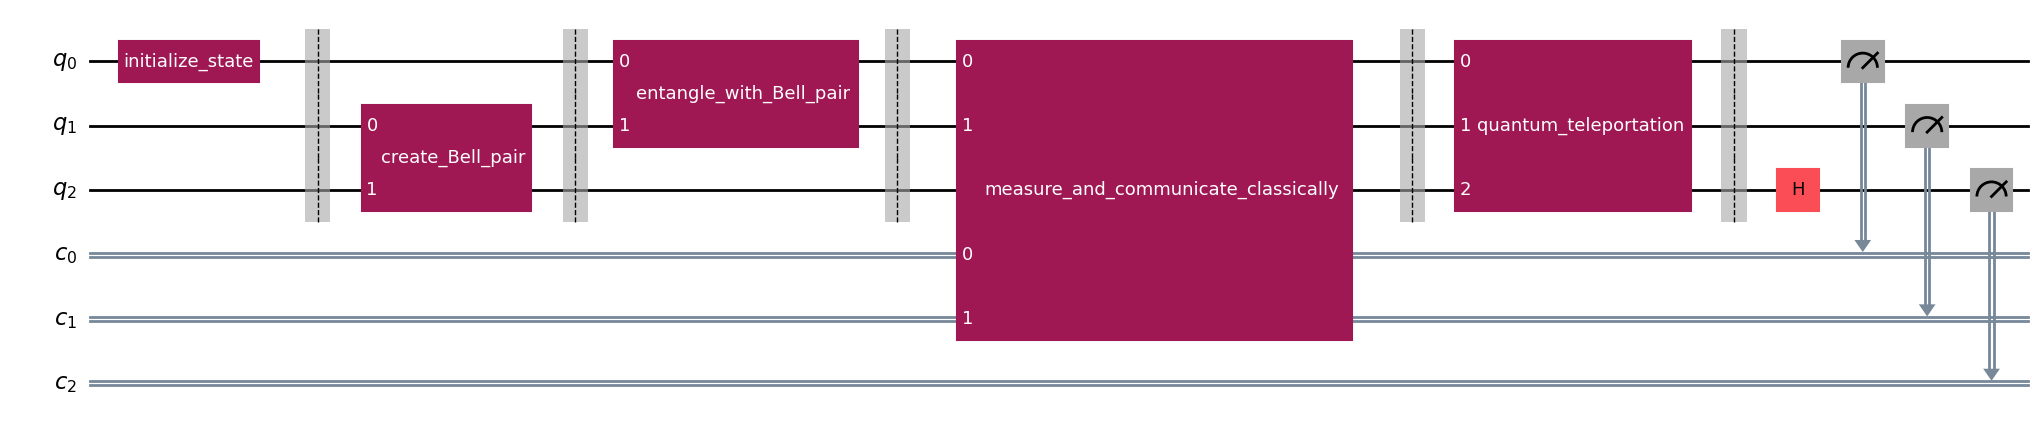

In [45]:
from qiskit import QuantumCircuit
from numpy import cos, sin, pi, arctan2, sqrt

def initialize_state(theta):
    qc = QuantumCircuit(1, name='initialize_state')
    qc.h(0)
    qc.rz(theta, 0)
    return qc

def create_Bell_pair():
    qc = QuantumCircuit(2, name='create_Bell_pair')
    qc.h(0)
    qc.cx(0,1)
    return qc

def entangle_with_Bell_pair():
    qc = QuantumCircuit(2, name='entangle_with_Bell_pair')
    qc.cx(0,1)
    qc.h(0)
    return qc

def measure_and_communicate_classically():
    qc = QuantumCircuit(2, 2, name='measure_and_communicate_classically')
    qc.measure([0,1], [0,1])
    return qc

def quantum_teleportation():
    qc = QuantumCircuit(3, name='quantum_teleportation')
    qc.cx(1,2)
    qc.cz(0,2)
    return qc

def teleportation_circuit(theta, measurement_basis="x"):
    qc = QuantumCircuit(3, 3)

    qc.append(initialize_state(theta).to_instruction(), [0])
    qc.barrier()

    qc.append(create_Bell_pair().to_instruction(), [1,2])
    qc.barrier()

    qc.append(entangle_with_Bell_pair().to_instruction(), [0,1])
    qc.barrier()

    qc.append(measure_and_communicate_classically().to_instruction(), [0,1], [0,1])
    qc.barrier()

    qc.append(quantum_teleportation().to_instruction(), [0,1,2])
    qc.barrier()

    if measurement_basis == "y":
        qc.rz(-pi/2, 2)

    if measurement_basis in ["x", "y"]:
        qc.h(2)

    qc.measure([0,1,2], [0,1,2])

    return qc

tele_qc = teleportation_circuit(0)
tele_qc.draw("mpl", fold=-1, cregbundle=False);

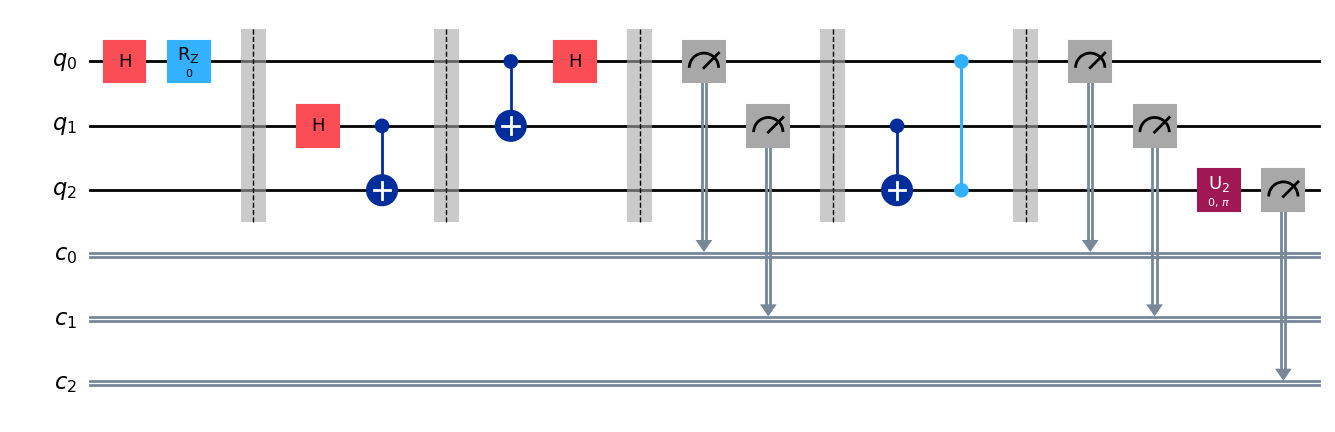

In [46]:
tele_qc.decompose().draw("mpl", fold=-1, cregbundle=False);

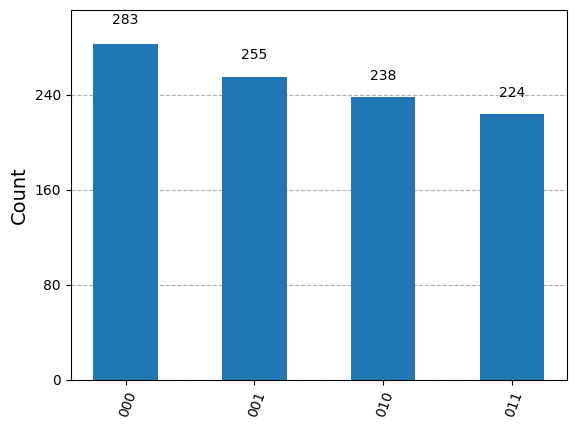

In [47]:
plot_histogram(simulator.run(tele_qc.decompose(), shots=1000).result().get_counts(tele_qc));

**Example: Reading out a rotation by $\pi/4$ around the z-axis of the state $\lvert{+}\rangle = H\lvert0\rangle=\frac{\sqrt{2}}{2}\lvert0\rangle+\frac{\sqrt{2}}{2}\lvert1\rangle$ after teleportation.**

In [48]:
theta = pi/4

qc_x = teleportation_circuit(theta, measurement_basis="x")
qc_y = teleportation_circuit(theta, measurement_basis="y")
qc_z = teleportation_circuit(theta, measurement_basis="z")

In [49]:
shots = 100_000

counts_x = simulator.run(qc_x.decompose(), shots=shots).result().get_counts(qc_x)
counts_y = simulator.run(qc_y.decompose(), shots=shots).result().get_counts(qc_y)
counts_z = simulator.run(qc_z.decompose(), shots=shots).result().get_counts(qc_z)

**Observed state**

In [50]:
(x,y,z)=(counts_to_coord(counts_x,shots),counts_to_coord(counts_y,shots),counts_to_coord(counts_z,shots))

print((x,y,z))

(0.70648, 0.7040200000000001, 0.006780000000000008)


**Expected state**

In [51]:
(cos(theta), sin(theta),0)

(0.7071067811865476, 0.7071067811865475, 0)